In [2]:
import pandas as pd

weather = pd.read_excel(r"C:\Users\ASUS\OneDrive\Desktop\AI project\filled.xlsx", index_col="date")

In [3]:
weather

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
date,,,,,,,,,,
2019-01-01,25.9,22.8,29.4,0.0,NaN,26.0,2.0,NaN,1016.1,NaN
2019-01-02,26.1,22.5,30.3,0.0,NaN,NaN,1.6,NaN,1015.6,NaN
2019-01-03,25.1,22.0,28.8,0.0,NaN,NaN,1.5,NaN,1015.7,NaN
2019-01-04,26.1,23.4,29.0,0.0,NaN,NaN,1.7,NaN,1014.6,NaN
2019-01-05,26.0,24.9,29.8,0.3,NaN,NaN,1.8,NaN,1013.6,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-12-27,29.5,24.9,35.2,0.4,NaN,8.0,3.4,NaN,1013.3,NaN
2024-12-28,28.9,25.6,33.6,0.0,NaN,37.0,3.1,NaN,1013.9,NaN
2024-12-29,27.6,23.6,32.2,0.0,NaN,59.0,4.4,NaN,1014.0,NaN


In [4]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

tavg    0.000000
tmin    0.000000
tmax    0.000000
prcp    0.000000
snow    1.000000
wdir    0.393704
wspd    0.000000
wpgt    1.000000
pres    0.000000
tsun    1.000000
dtype: float64

In [5]:
valid_columns = weather.columns[null_pct < .05]

In [6]:
valid_columns

Index(['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'pres'], dtype='object')

In [7]:
weather = weather[valid_columns].copy()

In [8]:
weather.columns = weather.columns.str.lower()

In [9]:
weather

,tavg,tmin,tmax,prcp,wspd,pres
date,,,,,,
2019-01-01,25.9,22.8,29.4,0.0,2.0,1016.1
2019-01-02,26.1,22.5,30.3,0.0,1.6,1015.6
2019-01-03,25.1,22.0,28.8,0.0,1.5,1015.7
2019-01-04,26.1,23.4,29.0,0.0,1.7,1014.6
2019-01-05,26.0,24.9,29.8,0.3,1.8,1013.6
...,...,...,...,...,...,...
2024-12-27,29.5,24.9,35.2,0.4,3.4,1013.3
2024-12-28,28.9,25.6,33.6,0.0,3.1,1013.9
2024-12-29,27.6,23.6,32.2,0.0,4.4,1014.0


In [10]:
weather = weather.ffill()

In [11]:
weather.apply(pd.isnull).sum()

tavg    0
tmin    0
tmax    0
prcp    0
wspd    0
pres    0
dtype: int64

In [12]:
weather.apply(lambda x: (x == 9999).sum())

tavg    0
tmin    0
tmax    0
prcp    0
wspd    0
pres    0
dtype: int64

In [13]:
weather.dtypes

tavg    float64
tmin    float64
tmax    float64
prcp    float64
wspd    float64
pres    float64
dtype: object

In [14]:
weather.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25',
               '2024-12-26', '2024-12-27', '2024-12-28', '2024-12-29',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='date', length=2192, freq=None)

In [15]:
weather.index = pd.to_datetime(weather.index)

In [16]:
weather.index.year.value_counts().sort_index()

date
2019    365
2020    366
2021    365
2022    365
2023    365
2024    366
Name: count, dtype: int64

<Axes: xlabel='date'>

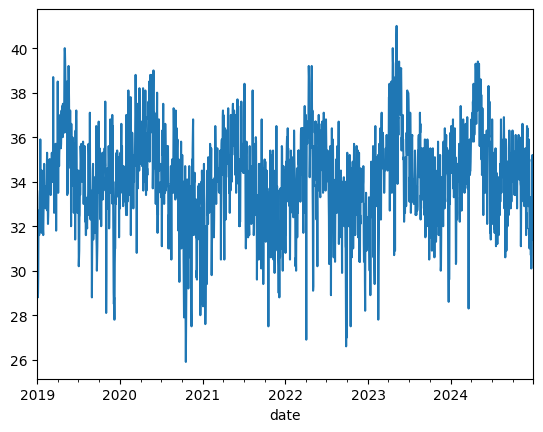

In [17]:
weather["tmax"].plot()

In [18]:
weather["target"] = weather.shift(-1)["tmax"]

In [19]:
weather

,tavg,tmin,tmax,prcp,wspd,pres,target
date,,,,,,,
2019-01-01,25.9,22.8,29.4,0.0,2.0,1016.1,30.3
2019-01-02,26.1,22.5,30.3,0.0,1.6,1015.6,28.8
2019-01-03,25.1,22.0,28.8,0.0,1.5,1015.7,29.0
2019-01-04,26.1,23.4,29.0,0.0,1.7,1014.6,29.8
2019-01-05,26.0,24.9,29.8,0.3,1.8,1013.6,32.0
...,...,...,...,...,...,...,...
2024-12-27,29.5,24.9,35.2,0.4,3.4,1013.3,33.6
2024-12-28,28.9,25.6,33.6,0.0,3.1,1013.9,32.2
2024-12-29,27.6,23.6,32.2,0.0,4.4,1014.0,33.7


In [20]:
weather = weather.ffill()

In [21]:
weather

,tavg,tmin,tmax,prcp,wspd,pres,target
date,,,,,,,
2019-01-01,25.9,22.8,29.4,0.0,2.0,1016.1,30.3
2019-01-02,26.1,22.5,30.3,0.0,1.6,1015.6,28.8
2019-01-03,25.1,22.0,28.8,0.0,1.5,1015.7,29.0
2019-01-04,26.1,23.4,29.0,0.0,1.7,1014.6,29.8
2019-01-05,26.0,24.9,29.8,0.3,1.8,1013.6,32.0
...,...,...,...,...,...,...,...
2024-12-27,29.5,24.9,35.2,0.4,3.4,1013.3,33.6
2024-12-28,28.9,25.6,33.6,0.0,3.1,1013.9,32.2
2024-12-29,27.6,23.6,32.2,0.0,4.4,1014.0,33.7


In [22]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [23]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [24]:
def backtest(weather, model, predictors, start=365, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [25]:
predictions = backtest(weather, rr, predictors)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

1.1357060181835668

In [27]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
date,,,
2023-02-14,27.8,34.650057,6.850057
2024-03-19,28.3,34.980091,6.680091
2023-04-29,30.9,36.751648,5.851648
2021-10-16,27.5,33.116671,5.616671
2023-04-25,30.7,36.278983,5.578983
...,...,...,...
2020-08-19,34.7,34.696353,0.003647
2024-05-31,33.5,33.503369,0.003369
2023-08-04,33.8,33.797880,0.002120


In [28]:
pd.Series(rr.coef_, index=predictors)

tavg    0.632271
tmin   -0.086251
tmax    0.283131
prcp   -0.001545
wspd    0.022149
pres    0.025087
dtype: float64

In [29]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [30]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [31]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [32]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [33]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

1.1345546055053095

In [34]:
mean_squared_error(predictions["actual"], predictions["prediction"])

2.152792380190457

In [35]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
date,,,
2023-02-14,27.8,34.649181,6.849181
2024-03-19,28.3,35.028498,6.728498
2023-04-25,30.7,36.707241,6.007241
2023-04-29,30.9,36.857326,5.957326
2021-10-16,27.5,32.726965,5.226965
...,...,...,...
2022-09-17,32.0,31.997030,0.002970
2021-06-21,35.2,35.202558,0.002558
2022-10-02,32.6,32.597664,0.002336


In [36]:
weather.loc["2022-03-07": "2022-03-17"]

,tavg,tmin,tmax,prcp,wspd,pres,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
date,,,,,,,,,,,,,,,,,,,,,
2022-03-07,29.8,27.9,35.2,0.000000,4.6,1009.7,33.1,34.833333,1.052632e-02,27.833333,...,25.564286,0.091366,2.555952,-1.000000,34.803000,34.550,27.260000,27.050,2.223167,0.000000
2022-03-08,28.3,25.0,33.1,2.000000,2.6,1010.3,34.7,34.500000,-4.057971e-02,26.900000,...,25.742857,-0.028857,1.591667,0.256545,34.786139,34.125,27.237624,25.875,2.220957,0.833333
2022-03-09,29.5,26.0,34.7,4.433333,1.7,1009.2,36.1,34.333333,1.067961e-02,26.300000,...,25.885714,0.004415,1.908333,1.323144,34.785294,34.750,27.225490,26.550,2.242647,5.183333
2022-03-10,30.3,27.5,36.1,1.933333,3.2,1008.0,36.4,34.633333,4.234841e-02,26.166667,...,26.178571,0.050477,2.039286,-0.051956,34.798058,35.350,27.228155,27.025,2.239644,3.225000
2022-03-11,30.8,27.9,36.4,0.650000,4.5,1007.0,35.4,35.733333,1.865672e-02,27.133333,...,26.514286,0.052263,2.060714,-0.684575,34.813462,35.800,27.234615,27.125,2.224359,0.970833
2022-03-12,31.2,28.2,35.4,3.000000,3.2,1006.3,34.5,35.966667,-1.575533e-02,27.866667,...,26.857143,0.050000,2.271429,0.320755,34.819048,36.600,27.243810,27.325,2.231746,2.412500
2022-03-13,31.1,28.3,34.5,3.000000,3.9,1006.5,36.2,35.433333,-2.634055e-02,28.133333,...,27.221429,0.039622,1.609524,0.863905,34.816038,35.075,27.253774,27.725,2.238994,3.000000
2022-03-14,30.7,28.5,36.2,0.300000,3.6,1007.7,35.0,35.366667,2.356268e-02,28.333333,...,27.485714,0.036902,1.573810,-0.809380,34.828972,34.850,27.265421,27.825,2.220872,0.975000
2022-03-15,30.9,28.0,35.0,1.733333,3.5,1006.8,36.4,35.233333,-6.622517e-03,28.266667,...,27.521429,0.017389,1.640476,0.056604,34.830556,34.600,27.272222,27.450,2.216358,1.375000


<Axes: xlabel='diff'>

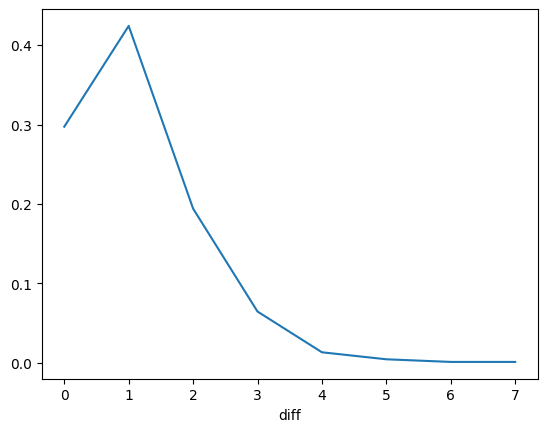

In [37]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [38]:
predictions

,actual,prediction,diff
date,,,
2020-01-15,34.1,34.123596,0.023596
2020-01-16,34.7,34.494245,0.205755
2020-01-17,34.1,34.608249,0.508249
2020-01-18,33.4,34.437360,1.037360
2020-01-19,34.2,34.790943,0.590943
...,...,...,...
2024-12-27,33.6,34.186299,0.586299
2024-12-28,32.2,33.583370,1.383370
2024-12-29,33.7,32.855056,0.844944


In [39]:
num_err = count_over_1_5 = (predictions["diff"] > 2).sum()
print(f"number: {count_over_1_5}")

percent_error = (count_over_1_5 / len(predictions)) * 100
print(f"Percent of error: {percent_error:.2f}%")

number: 293
Percent of error: 16.16%


In [40]:
import pandas as pd
import datetime

weather.index = pd.to_datetime(weather.index, format='%Y-%m-%d')
weather['day_of_year'] = weather.index.dayofyear

features = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'pres', 'rolling_3_tmax',
            'rolling_3_tmax_pct', 'rolling_3_tmin', 'rolling_3_tmin_pct',
            'rolling_3_prcp', 'rolling_3_prcp_pct', 'rolling_14_tmax',
            'rolling_14_tmax_pct', 'rolling_14_tmin', 'rolling_14_tmin_pct',
            'rolling_14_prcp', 'rolling_14_prcp_pct', 'month_avg_tmax',
            'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp',
            'day_avg_prcp']

predicted_temperatures = []
dates = []

today = datetime.datetime.today()

for i in range(6):
    future_date = today + datetime.timedelta(days=i)
    day_of_year = future_date.timetuple().tm_yday
    future_features = weather.loc[weather['day_of_year'] == day_of_year, features].iloc[0]
    prediction = rr.predict(future_features.to_frame().T)[0]
    predicted_temperatures.append(prediction)
    dates.append(future_date.strftime('%Y/%m/%d'))

for date, temp in zip(dates, predicted_temperatures):
    print(f"Predicted temperature for {date}: {temp:.2f}°C")


Predicted temperature for 2025/03/27: 34.77°C
Predicted temperature for 2025/03/28: 35.61°C
Predicted temperature for 2025/03/29: 35.19°C
Predicted temperature for 2025/03/30: 35.25°C
Predicted temperature for 2025/03/31: 35.21°C
Predicted temperature for 2025/04/01: 36.41°C


In [41]:
import requests
import datetime

CITY = "Bangkok"
API_KEY = "23faa9452bf37ea6a8c833688231fcfd"
forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"
forecast_response = requests.get(forecast_url)

if forecast_response.status_code == 200:
    forecast_data = forecast_response.json()

    print("TMAX for 5 days:")
    daily_tmax = {}

    for item in forecast_data['list']:
        date = datetime.datetime.fromtimestamp(item['dt']).strftime('%Y/%m/%d')
        temp_max = item['main']['temp_max']
        
        if date not in daily_tmax or temp_max > daily_tmax[date]:
            daily_tmax[date] = temp_max

    count = 0
    for date, tmax in daily_tmax.items():
        print(f"{date}: {tmax}°C")
        count += 1
        if count == 6:
            break

else:
    print(f"Error fetching data: {forecast_response.status_code}")


TMAX for 5 days:
2025/03/27: 33.47°C
2025/03/28: 37.34°C
2025/03/29: 36.95°C
2025/03/30: 35.36°C
2025/03/31: 35.71°C
2025/04/01: 33.84°C


In [42]:
import datetime

print("\nComparison between Predicted Temp and API Temp:")
print("Date\t\tMy Prediction (°C)\tAPI Temp (°C)\tDiff (°C)")
print("-" * 60)

for date, pred_temp in zip(dates, predicted_temperatures):
    formatted_date = datetime.datetime.strptime(date, "%Y/%m/%d").strftime("%Y/%m/%d")
    api_temp = daily_tmax.get(formatted_date, "N/A")
    if isinstance(pred_temp, float) and isinstance(api_temp, float):
        diff = round(pred_temp - api_temp, 2)
        print(f"{date}\t{pred_temp:.2f}\t\t\t{api_temp:.2f}\t\t{diff:+.2f}")
    else:
        print(f"{date}\t{pred_temp}\t\t\t{api_temp}\t\tN/A")


Comparison between Predicted Temp and API Temp:
Date		My Prediction (°C)	API Temp (°C)	Diff (°C)
------------------------------------------------------------
2025/03/27	34.77			33.47		+1.30
2025/03/28	35.61			37.34		-1.73
2025/03/29	35.19			36.95		-1.76
2025/03/30	35.25			35.36		-0.11
2025/03/31	35.21			35.71		-0.50
2025/04/01	36.41			33.84		+2.57
